In [1]:
import os
import cv2
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import pandas as pd
from scipy.stats import mannwhitneyu

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('titanic.csv')

In [9]:
print(df.shape)
print(df.dtypes)

#отбор числовых колонок
df_num = df.select_dtypes(include=[np.number])
num_cols = df_num.columns.values
print(num_cols)

#отбор нечисловых колонок
df_non_num = df.select_dtypes(exclude=[np.number])
non_num_cols = df_non_num.columns.values
print(non_num_cols)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: ylabel='Density'>

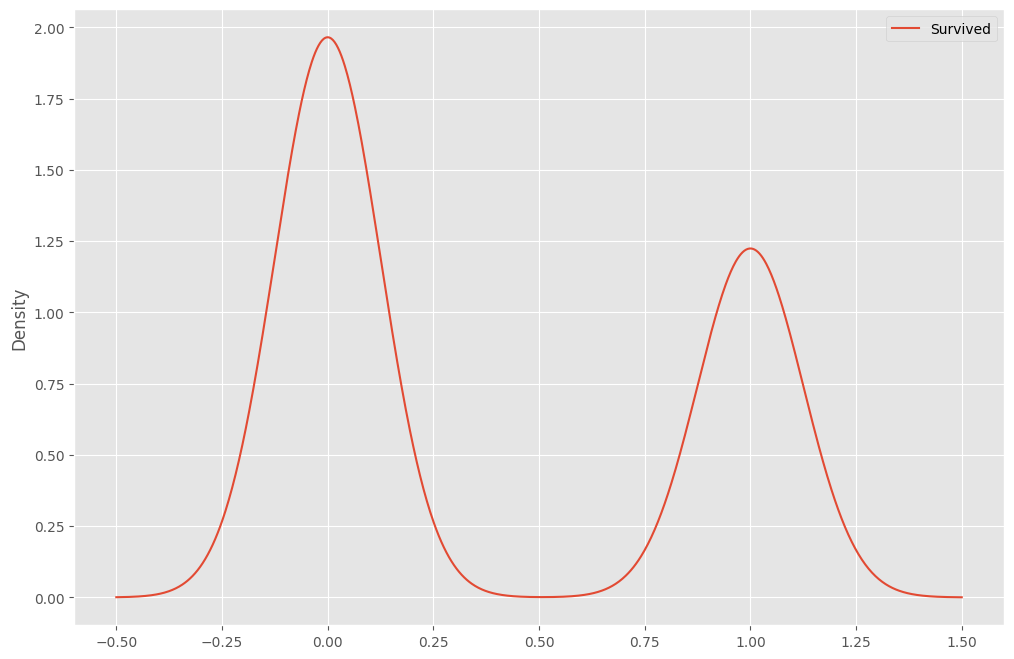

In [31]:
df.plot.density(x='Pclass', y='Survived')

In [33]:
df.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [34]:
#Отобразим классы билетов 
df.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [35]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [12]:
men = df[df.Sex == 'male'] 
women = df[df.Sex == 'female']

In [26]:
stat, p = mannwhitneyu(men.Fare, women.Fare)
print('Критерий значимости = %.3f' % (p))

alpha = 0.1
if p > alpha:
    print('Возвраст не отличался')
else:
    print('Действительно разный тариф, мужчины',
        men.Fare.mean(), ', женщины', women.Fare.mean())

Критерий значимости = 0.000
Действительно разный тариф, мужчины 25.523893414211443 , женщины 44.47981783439491


In [30]:
stat, p = mannwhitneyu(men.Age, women.Age)
print('Критерий значимости = %.3f' % (p))

alpha = 0.1
if p > alpha:
    print('Возвраст не отличался')
else:
    print('Действительно разный возраст, мужчины',
        men.Age.mean(), ', женщины', women.Age.mean())

Критерий значимости = nan
Действительно разный возраст, мужчины 30.72664459161148 , женщины 27.915708812260537


# sns.catplot(data = df, y="Survived", x="Sex", col="Pclass",
           kind='bar', saturation=0.5, color='yellow', palette=)

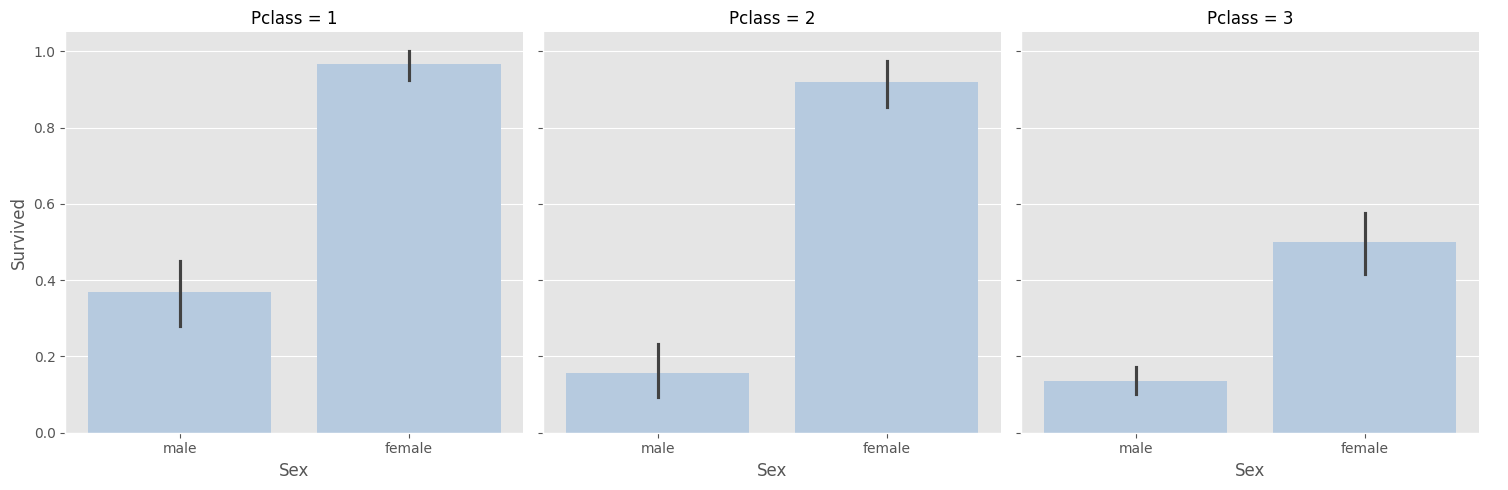

In [75]:
sns.set_palette("pastel")
sns.catplot(data = df, y="Survived", x="Sex", col="Pclass",
       kind='bar', saturation=0.5)

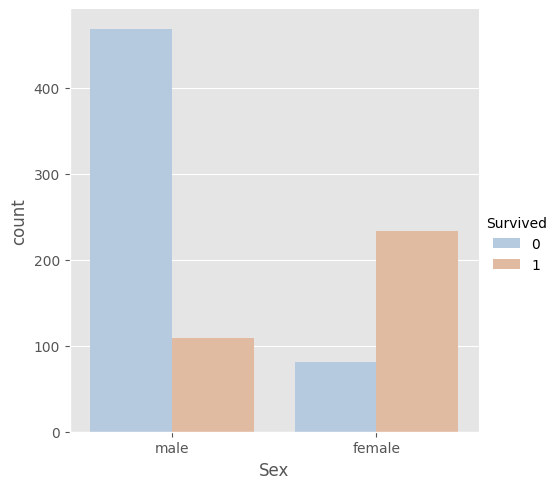

In [73]:
sns.set_palette("pastel")
sns.catplot(data = df, hue = 'Survived', x = 'Sex',
           kind = 'count', saturation=0.5, )

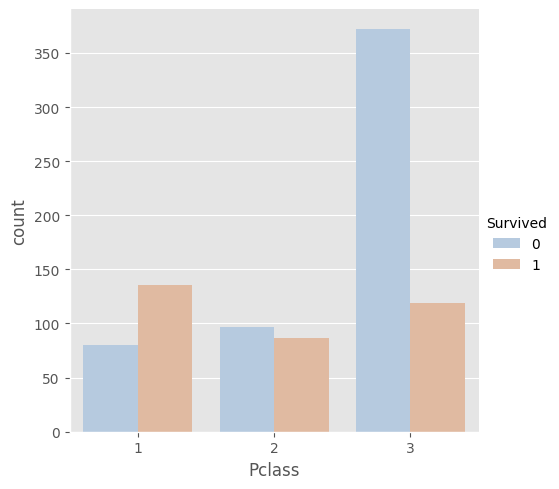

In [85]:
sns.catplot(data = df, hue = 'Survived', x = 'Pclass',
           kind = 'count', saturation=0.5, )

<Axes: >

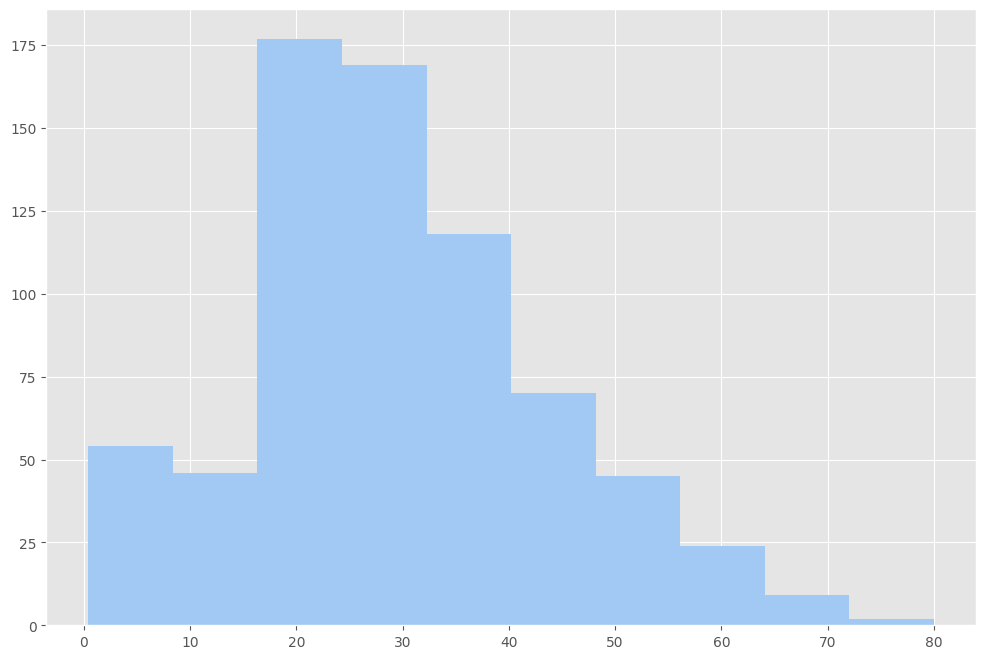

In [86]:
df.Age.hist()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '(0.419, 17.0]'),
  Text(1, 0, '(17.0, 21.714]'),
  Text(2, 0, '(21.714, 26.0]'),
  Text(3, 0, '(26.0, 30.0]'),
  Text(4, 0, '(30.0, 36.0]'),
  Text(5, 0, '(36.0, 45.5]'),
  Text(6, 0, '(45.5, 80.0]')])

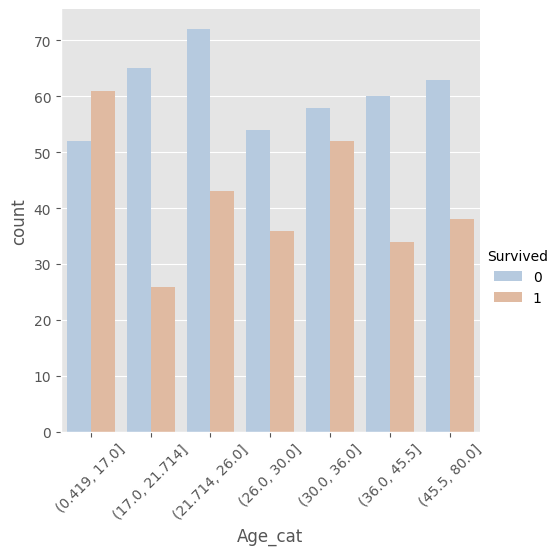

In [94]:
df['Age_cat'] = pd.qcut(df.Age,7)
sns.catplot(data = df,hue='Survived',x='Age_cat',
           kind='count', saturation=0.5) 
plt.xticks(rotation=45)